In [38]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from subtle.utils.io import load_h5_file
from subtle.data_loaders import SliceLoader
import subtle.subtle_loss as suloss
from subtle.subtle_preprocess import enhancement_mask, enh_mask_smooth
import sigpy.plot as pl


(196, 3, 240, 240) (196, 3, 240, 240)


<IPython.core.display.Javascript object>


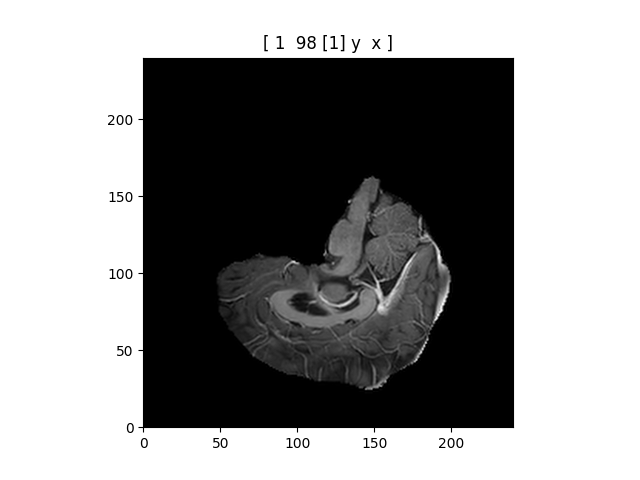

In [47]:
fpath_h5 = '/raid/jon/data_full_tiantan_nohist/data/NO26.h5'
data = load_h5_file(fpath_h5, h5_key='data')
data_mask = load_h5_file(fpath_h5, h5_key='data_mask')
print(data.shape, data_mask.shape)
pl.ImagePlot(np.stack((data, data_mask)))

16.509466


<IPython.core.display.Javascript object>


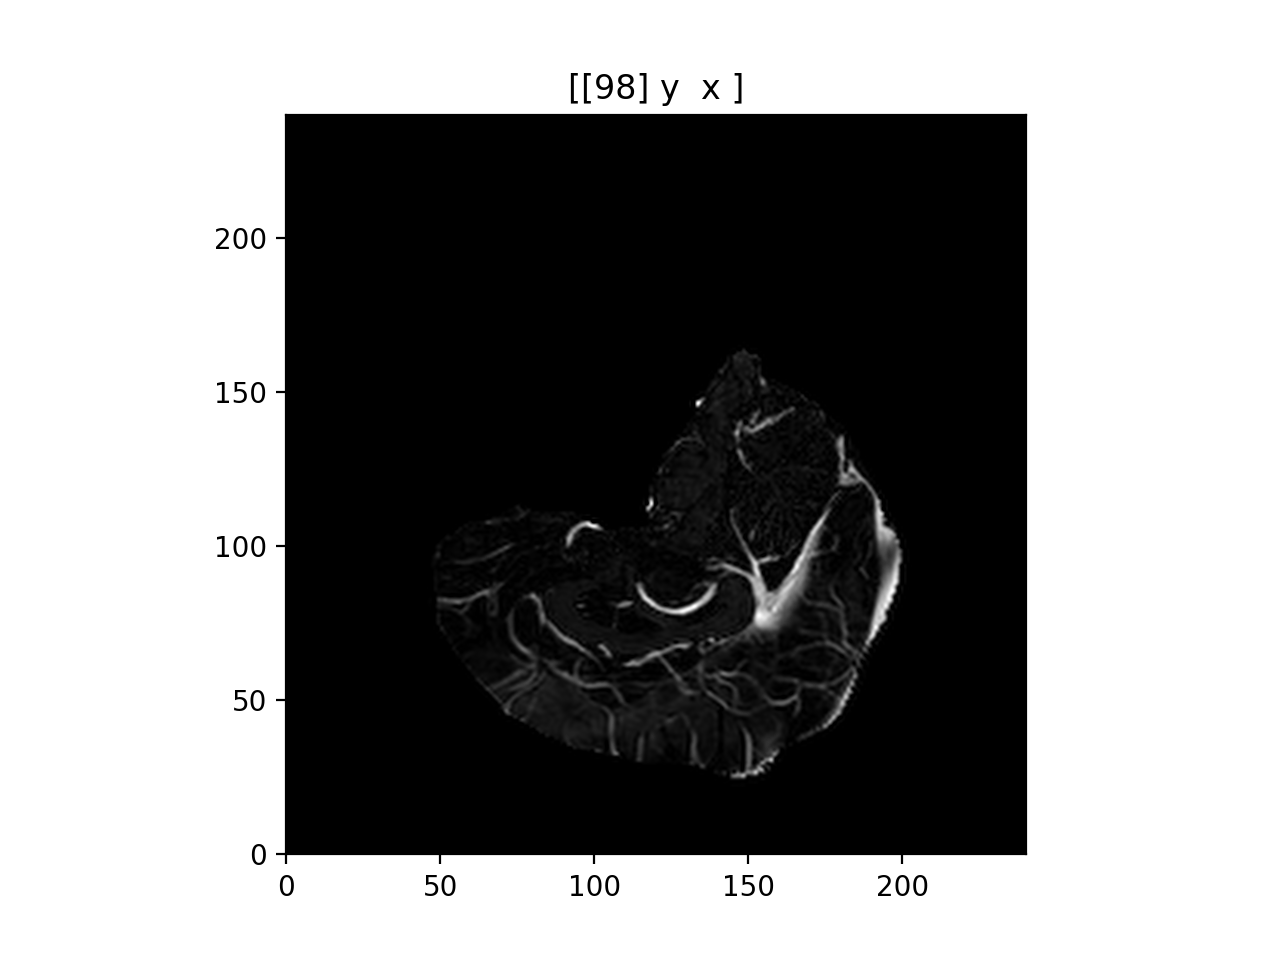

In [5]:
im_diff = data_mask[:,2,...] - data_mask[:,0,...]
im_diff_max = np.max(abs(im_diff))
print(im_diff_max)
pl.ImagePlot(im_diff)

<IPython.core.display.Javascript object>


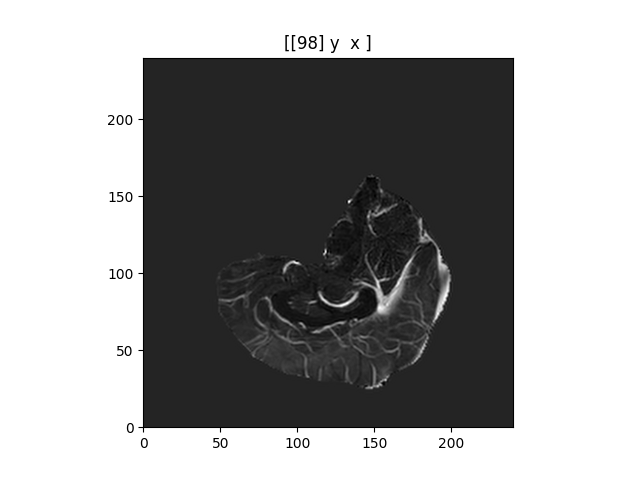

In [48]:
th = .05 * im_diff_max
enh_mask = (im_diff - np.min(im_diff)) / np.max(im_diff)
enh_mask = enh_mask ** 1


# enh_mask2 = crop_fun(abs(im_diff)/im_diff_max, abs(im_diff))
pl.ImagePlot(enh_mask)

(196, 1, 2, 240, 240) (196, 1, 1, 240, 240)


<IPython.core.display.Javascript object>


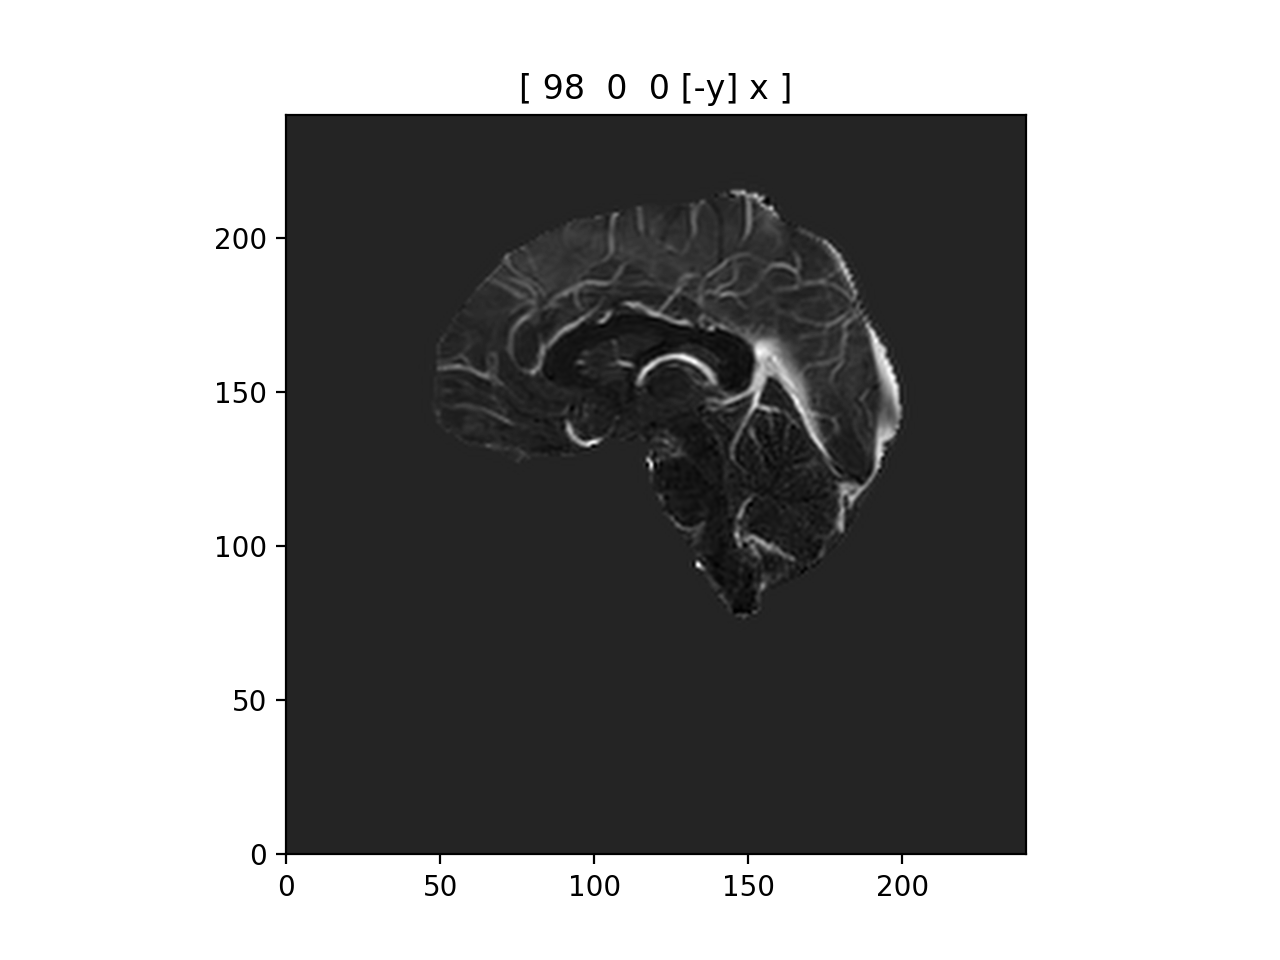

In [32]:
X = data_mask[:,:2,...][:,None,...]
Y = data_mask[:,-1,...][:,None,None,...]
print(X.shape, Y.shape)
enh_mask0 = enhancement_mask(X, Y, center_slice=0)
enh_mask0 = enh_mask_smooth(X, Y, center_slice=0, p=1)
pl.ImagePlot(enh_mask0)

## Look at difference between 2D mask and 3D mask

<IPython.core.display.Javascript object>


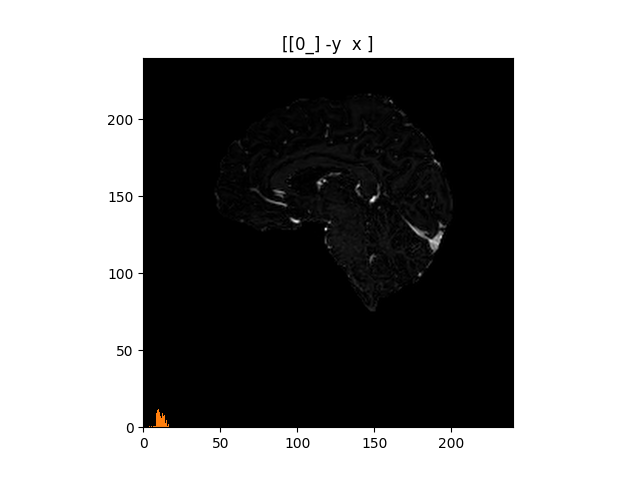

In [35]:
# enh mask is normalized by max abs signal intensity. let's look at the difference in 2D vs. 3D
im_diff = Y.squeeze() - X[:,:,0,...].squeeze()
z1 = np.max(abs(im_diff))
z2 = np.max(abs(im_diff.reshape((im_diff.shape[0], -1))), axis=1)

pl.ImagePlot(im_diff)

16.509466
[7.84743097e-16 9.72542584e-16 3.55361407e-15 1.33302674e-14
 4.89369660e-14 1.82062278e-13 6.73543036e-13 2.47706586e-12
 9.26549115e-12 3.35625833e-11 1.27396954e-10 4.68378558e-10
 1.75085180e-09 6.57131327e-09 2.40519835e-08 9.19889160e-08
 3.40089088e-07 1.28483543e-06 4.88161686e-06 1.79059207e-05
 6.98372023e-05 2.48992641e-04 9.96117014e-04 3.45474761e-03
 1.41696902e-02 4.78278361e-02 2.04822496e-01 1.80802274e+00
 5.48202896e+00 7.18202591e+00 8.30668259e+00 8.77992535e+00
 9.26096153e+00 8.97176361e+00 8.92747307e+00 9.38282013e+00
 9.30534363e+00 8.85348892e+00 9.69327354e+00 9.79844284e+00
 9.47727489e+00 9.07044601e+00 9.43299103e+00 1.06804276e+01
 9.70479012e+00 9.90338898e+00 1.03858480e+01 1.01813517e+01
 1.15189791e+01 1.22168550e+01 1.03426752e+01 1.01204128e+01
 1.02724476e+01 1.07976675e+01 1.06251736e+01 1.05734320e+01
 1.06272230e+01 1.04961052e+01 1.14579639e+01 1.13870001e+01
 1.08012295e+01 1.13335876e+01 1.15578022e+01 1.10905104e+01
 1.16099386e+0

<IPython.core.display.Javascript object>


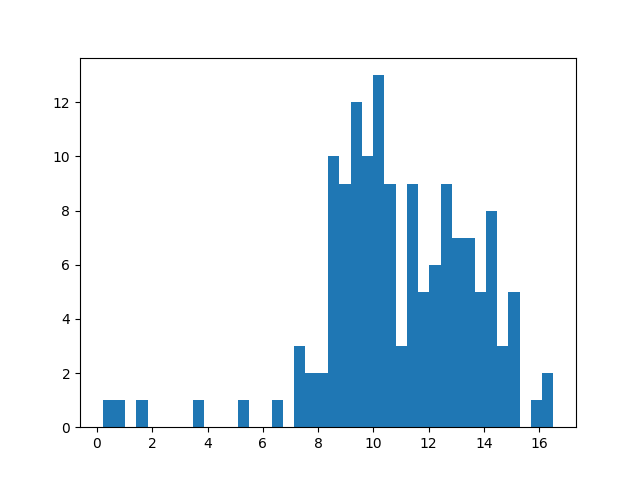

In [41]:
print(z1)
print(z2)

plt.hist(z2[z2>0.1], 40);

<IPython.core.display.Javascript object>


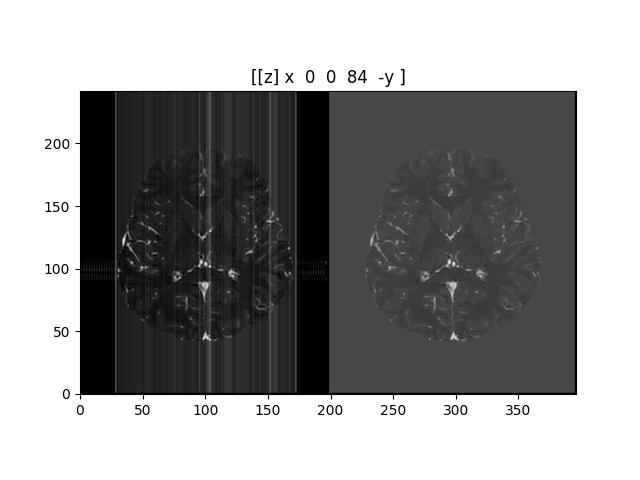

In [49]:
enh_mask_3D = enh_mask_smooth(X, Y, center_slice=0, p=1)
enh_mask_2D = np.zeros(enh_mask_3D.shape)
for ii in range(enh_mask_2D.shape[0]):
    enh_mask_2D[ii,...] = enh_mask_smooth(X[ii,...][None,...], Y[ii,...][None,...], center_slice=0, p=1)
pl.ImagePlot(np.stack((enh_mask_2D, enh_mask_3D)))

### OLD

In [ ]:
def scurve(x):
    y = .5 * (1 + 2 * x / (1 + x **2))
    y[np.where(x <= -1)] = 0
    y[np.where(x >= 1)] = 1
    return y


def crop_fun(crth, val):
    return scurve(np.sqrt(val) - crth)  / (1 - crth)

<IPython.core.display.Javascript object>


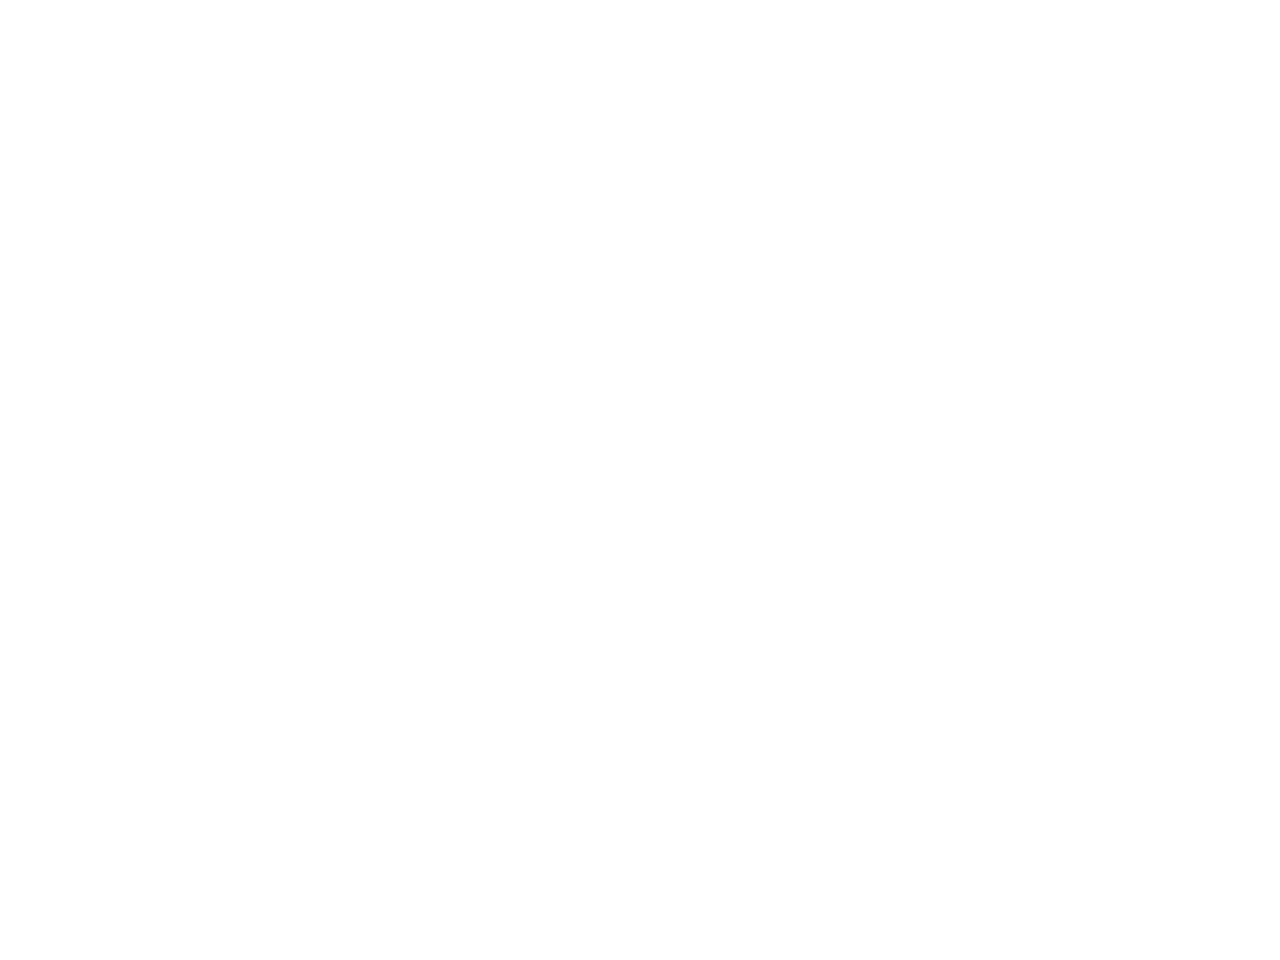

NameError: name 'scurve' is not defined

In [4]:
plt.figure()
plt.plot(scurve(np.arange(-1, 1, .001)))

plt.figure()
plt.plot(crop_fun(.5, np.arange(0, 1, .001)))